In [ ]:
# Install necessary elements
from lavague.drivers.selenium import SeleniumDriver
from lavague.core import ActionEngine, WorldModel
from lavague.core.agents import WebAgent

from llama_index.llms.gemini import Gemini
from llama_index.embeddings.fireworks import FireworksEmbedding
from llama_index.multi_modal_llms.gemini import GeminiMultiModal

embed_model = FireworksEmbedding()
mm_llm = GeminiMultiModal(model_name="models/gemini-1.5-pro-latest")
llm = Gemini(model_name="models/gemini-1.5-flash-latest")

from google.generativeai.types import HarmCategory, HarmBlockThreshold

llm._model._safety_settings={
    HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
}

# Set up our three key components: Driver, Action Engine, World Model
driver = SeleniumDriver()
action_engine = ActionEngine(driver, llm=llm, embedding=embed_model)
world_model = WorldModel()

# Create Web Agent
agent = WebAgent(world_model, action_engine)

# Set URL
agent.get("https://www.wikijournalclub.org/wiki/Main_Page")

objective = """I have the question: "what evidence is there for beta blockers helping patients after the patients suffered a myocardial infarction"
Find the most relevant paper to answer this question. Don't scan the whole page as it would be a waste of time as all articles are on the same page but scroll down or up if needed.
When answering the question using a given paper, explain how the paper is relevant, what were the major data that supports the answer, and how the experiment was designed."""

# Run agent with a specific objective
agent.demo(objective=objective)

In [4]:
# Install necessary elements
from lavague.drivers.selenium import SeleniumDriver
from lavague.core import ActionEngine, WorldModel
from lavague.core.agents import WebAgent

from llama_index.llms.gemini import Gemini
from llama_index.embeddings.fireworks import FireworksEmbedding

from selenium.webdriver.chrome.options import Options

chrome_options = Options()
chrome_options.add_experimental_option("debuggerAddress", "127.0.0.1:9222")
driver = SeleniumDriver(options=chrome_options)

embed_model = FireworksEmbedding()
llm = Gemini(model_name="models/gemini-1.5-flash-latest")

from google.generativeai.types import HarmCategory, HarmBlockThreshold

llm._model._safety_settings={
    HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
}

# Set up our three key components: Driver, Action Engine, World Model

action_engine = ActionEngine(driver, llm=llm, embedding=embed_model)
world_model = WorldModel()

# Create Web Agent
agent = WebAgent(world_model, action_engine)
# Set URL
# Set URL


2024-07-13 09:02:15,185 - INFO - Screenshot folder cleared


In [5]:

xpaths = list(xpaths)

JavascriptException: Message: javascript error: getEventListeners is not defined
  (Session info: chrome=126.0.6478.126)
Stacktrace:
#0 0x55ee4a538c7a <unknown>
#1 0x55ee4a21be2c <unknown>
#2 0x55ee4a221539 <unknown>
#3 0x55ee4a2235ac <unknown>
#4 0x55ee4a2ab2d9 <unknown>
#5 0x55ee4a28b5c2 <unknown>
#6 0x55ee4a2aa303 <unknown>
#7 0x55ee4a28b363 <unknown>
#8 0x55ee4a25b247 <unknown>
#9 0x55ee4a25bb9e <unknown>
#10 0x55ee4a4ff24b <unknown>
#11 0x55ee4a5032f1 <unknown>
#12 0x55ee4a4eaafe <unknown>
#13 0x55ee4a503e52 <unknown>
#14 0x55ee4a4cf79f <unknown>
#15 0x55ee4a528638 <unknown>
#16 0x55ee4a528810 <unknown>
#17 0x55ee4a537dac <unknown>
#18 0x7f4ec5bc9ac3 <unknown>


In [15]:
from lavague.core.base_driver import BaseDriver

def highlight_element(element, driver: BaseDriver):
    driver.execute_script(
        "arguments[0].setAttribute('style', arguments[1]);",
        element,
        "border: 2px solid red;",
    )

xpaths = driver.get_possible_interactions().keys()

from selenium.webdriver.common.by import By

elements = []

for id, xpath in enumerate(xpaths):
    try:
        element = driver.driver.find_element(By.XPATH, xpath)
        elements.append(element)
    except:
        continue
    highlight_element(element, driver)
    
def add_id_overlays(driver, elements):
    js_script = """
    function addIdOverlay(element, id) {
        const rect = element.getBoundingClientRect();
        const overlay = document.createElement('div');
        overlay.textContent = id;
        overlay.style.position = 'absolute';
        overlay.style.backgroundColor = 'rgba(255, 0, 0, 0.7)';
        overlay.style.color = 'white';
        overlay.style.padding = '2px 5px';
        overlay.style.borderRadius = '3px';
        overlay.style.fontSize = '12px';
        overlay.style.zIndex = '10000';
        overlay.style.pointerEvents = 'none';  // Ensure it doesn't interfere with clicks
        
        // Position the overlay at the top-left corner, outside the element
        overlay.style.left = (rect.left - 25) + 'px';
        overlay.style.top = (rect.top - 25) + 'px';
        
        // Adjust position if too close to the left edge
        if (rect.left < 30) {
            overlay.style.left = rect.right + 'px';
        }
        
        // Adjust position if too close to the top edge
        if (rect.top < 30) {
            overlay.style.top = rect.bottom + 'px';
        }
        
        document.body.appendChild(overlay);
    }
    
    const elements = arguments[0];
    for (let i = 0; i < elements.length; i++) {
        addIdOverlay(elements[i], i);
    }
    """
    driver.execute_script(js_script, elements)
    
add_id_overlays(driver, elements)

In [14]:
driver.driver.save_screenshot("highlighted_elements.png")

True

In [2]:
objective = """Provide a summary of a paper from this author on firearm injuries.
If you have to find information on paper, first navigate to it to have full access then extract the information.
Accept all cookies first.
"""

agent.run(objective=objective)

Exception in thread Thread-5 (lavague_unicode_animation):
Traceback (most recent call last):
  File "/home/dhuynh95/miniconda3/envs/lavague/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/dhuynh95/miniconda3/envs/lavague/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/home/dhuynh95/miniconda3/envs/lavague/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/home/dhuynh95/LaVague/lavague-core/lavague/core/utilities/unicode_animation.py", line 55, in lavague_unicode_animation
    term_size = os.get_terminal_size().columns // 2
OSError: [Errno 25] Inappropriate ioctl for device
2024-07-11 12:18:18,887 - INFO - Thoughts:
- The current screenshot shows the profile page of an author named Iram Khan on ResearchGate.
- The objective is to provide a summary of a paper from this author on firearm injuries.
- The first step is to locate 

2024-07-11 12:18:30,851 - INFO - Thoughts:
- The current screenshots show the profile page of the author Iram Khan on ResearchGate.
- The objective is to provide a summary of a paper from this author on firearm injuries.
- The list of publications is visible, but none of the titles in the visible part of the screenshots explicitly mention firearm injuries.
- To find the relevant paper, further navigation is required to explore the list of publications or search for the specific paper.
- The first step should be to accept all cookies to ensure smooth navigation.

Next engine: Navigation Engine
Instruction: Click on 'Accept' to accept all cookies.


2024-07-11 12:18:43,964 - INFO - Thoughts:
- The current screenshot shows the profile page of the author, Manisha Verma.
- The objective is to provide a summary of a paper from this author on firearm injuries.
- The page has tabs such as "About" and "Publications" which might contain the relevant paper.
- The next logical step is to navigate to the "Publications" tab to find the paper on firearm injuries.

Next engine: Navigation Engine
Instruction: Click on the "Publications" tab.


2024-07-11 12:18:57,340 - INFO - Thoughts:
- The current screenshot shows the "Publications" tab with a list of papers.
- The objective is to provide a summary of a paper from this author on firearm injuries.
- One of the papers listed is titled "Emerging Trends of Intentional Firearm Injuries in Northern India: A Study."
- This paper seems to be relevant to the objective.
- The next step is to navigate to this paper to gather more information for the summary.

Next engine: Navigation Engine
Instruction: Click on the paper titled "Emerging Trends of Intentional Firearm Injuries in Northern India: A Study."


2024-07-11 12:19:12,639 - INFO - Thoughts:
- The current screenshot shows a verification page from Cloudflare, indicating that the website is verifying the user as human.
- The objective is to provide a summary of a paper on firearm injuries.
- The verification process needs to be completed before proceeding to the paper.
- The best next step is to wait for the verification process to complete.

Next engine: Navigation Controls
Instruction: WAIT for the verification process to complete.


2024-07-11 12:19:18,053 - INFO - Thoughts:
- The current screenshot shows a verification page from Cloudflare, asking to verify that the user is human.
- The verification process needs to be completed to proceed further.
- The objective is to provide a summary of a paper on firearm injuries, but we are currently blocked by the verification step.
- The next step should be to complete the verification process.

Next engine: Navigation Engine
Instruction: Complete the verification process by clicking on the checkbox labeled "Verify you are human."


2024-07-11 12:19:22,115 - ERROR - Navigation error: No element found.
2024-07-11 12:19:25,136 - ERROR - Navigation error: No element found.
2024-07-11 12:19:28,190 - ERROR - Navigation error: No element found.
2024-07-11 12:19:31,538 - ERROR - Navigation error: No element found.
2024-07-11 12:19:35,754 - ERROR - Navigation error: No element found.
2024-07-11 12:19:41,040 - INFO - Thoughts:
- The current screenshot shows a verification page from Cloudflare, requiring the user to verify they are human.
- The previous instruction to click on the checkbox labeled "Verify you are human" failed.
- The verification process is essential to proceed to the next steps.
- The best next step is to wait for a few seconds to see if the verification process completes automatically or if further action is required.

Next engine: Navigation Controls
Instruction: WAIT for 10 seconds.


2024-07-11 12:19:46,007 - INFO - Thoughts:
- The current screenshot shows a verification page on ResearchGate, indicating that the verification process is still ongoing.
- The previous instruction to wait for 10 seconds was not sufficient to complete the verification process.
- The verification process might require additional steps or more time to complete.
- The best next step is to wait for a longer period to allow the verification process to complete.

Next engine: Navigation Controls
Instruction: WAIT for 30 seconds.


2024-07-11 12:19:46,592 - WARNING - The agent was interrupted.


ActionResult(instruction=None, code='from selenium import webdriver\nfrom selenium.webdriver.common.by import By\nfrom selenium.webdriver.chrome.options import Options\nfrom selenium.webdriver.common.keys import Keys\nfrom selenium.webdriver.common.action_chains import ActionChains\nfrom lavague.core.base_driver import JS_SETUP_GET_EVENTS\n\nelse:\nchrome_options = Options()\nchrome_options.add_argument("--headless=new")\nuser_agent = "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"\nchrome_options.add_argument(f"user-agent={user_agent}")\nchrome_options.add_argument("--no-sandbox")\nchrome_options.page_load_strategy = (\n)\nchrome_options.add_argument("--disable-web-security")\nchrome_options.add_argument("--disable-site-isolation-trials")\n\n"Page.addScriptToEvaluateOnNewDocument",\n{"source": JS_SETUP_GET_EVENTS},\n)\n\ndriver.set_window_size(1080, 1080)\nviewport_height = driver.execute_script("return window.innerHeight;")

In [1]:

import os
os.environ["LAVAGUE_UNIQUE_USER_ID"] = "the_wave_navigation_dataset"

# Install necessary elements
from lavague.drivers.selenium import SeleniumDriver
from lavague.core import ActionEngine, WorldModel
from lavague.core.agents import WebAgent

from llama_index.llms.gemini import Gemini
from llama_index.embeddings.fireworks import FireworksEmbedding

from selenium.webdriver.chrome.options import Options
from lavague.core.retrievers import IxpathRetriever

chrome_options = Options()
chrome_options.add_experimental_option("debuggerAddress", "127.0.0.1:9222")

embed_model = FireworksEmbedding()
llm = Gemini(model_name="models/gemini-1.5-flash-latest")

from google.generativeai.types import HarmCategory, HarmBlockThreshold

llm._model._safety_settings={
    HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
}

# Set up our three key components: Driver, Action Engine, World Model
driver = SeleniumDriver(options=chrome_options)
action_engine = ActionEngine(driver, llm=llm, embedding=embed_model)

action_engine.navigation_engine.retriever = IxpathRetriever(driver)
action_engine.navigation_engine.retriever.top_k = 5

world_model = WorldModel()

# Create Web Agent
agent = WebAgent(world_model, action_engine)
# Set URL

/home/dhuynh95/LaVague/lavague-core/lavague/core/__init__.py:21: UserWarning: Telemetry is turned on. To turn off telemetry, set your LAVAGUE_TELEMETRY to 'NONE'
  warnings.warn(warning_message, UserWarning)
/home/dhuynh95/LaVague/lavague-core/lavague/core/utilities/version_checker.py:46: UserWarning: You are using lavague-core version 0.2.21, however version 0.2.22 is available. You should consider upgrading via the 'pip install --upgrade lavague-core' command.
  warnings.warn(
/home/dhuynh95/miniconda3/envs/lavague/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-07-11 19:43:35,438 - INFO - Screenshot folder cleared


In [2]:
agent.get("https://orcid.org/0000-0001-6102-7846")
objective = """Find me the abstract of a paper on how to make hybrid potatoes.
Examples of good instructions to find papers can be "'Click on 'Show more detail' next to the paper 'What is love?'"
Accept all cookie banners.
Don't use the search bar.
"""

agent.run(objective=objective)

Exception in thread Thread-5 (lavague_unicode_animation):
Traceback (most recent call last):
  File "/home/dhuynh95/miniconda3/envs/lavague/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/dhuynh95/miniconda3/envs/lavague/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/home/dhuynh95/miniconda3/envs/lavague/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/home/dhuynh95/LaVague/lavague-core/lavague/core/utilities/unicode_animation.py", line 55, in lavague_unicode_animation
    term_size = os.get_terminal_size().columns // 2
OSError: [Errno 25] Inappropriate ioctl for device
2024-07-11 19:43:42,930 - INFO - Thoughts:
- The current screenshot shows the ORCID website with a cookie consent banner.
- To proceed with finding the abstract of a paper on how to make hybrid potatoes, the cookie consent banner needs to be accepted first

2024-07-11 19:43:53,564 - INFO - Thoughts:
- The current screenshot shows the ORCID profile of John Bamberg.
- The page lists several works related to potato research.
- The objective is to find the abstract of a paper on how to make hybrid potatoes.
- The titles of the papers listed do not explicitly mention hybrid potatoes.
- The best approach is to explore the details of each paper to find the relevant abstract.

Next engine: Navigation Engine
Instruction: Click on 'Show more detail' next to the paper titled "Morphometric analysis of wild potato leaves".


2024-07-11 19:44:03,737 - INFO - Thoughts:
- The current screenshot shows the details of the paper titled "Morphometric analysis of wild potato leaves".
- The objective is to find the abstract of a paper on how to make hybrid potatoes.
- The current paper does not seem to be directly related to hybrid potatoes.
- There are other papers listed on the page that might be relevant.
- The next step should involve scanning the page to gather more information about other papers listed.

Next engine: Navigation Controls
Instruction: SCAN


2024-07-11 19:44:08,481 - INFO - ### Thoughts:
- The current screenshot shows the details of the paper titled "Morphometric analysis of wild potato leaves".
- The objective is to find the abstract of a paper on how to make hybrid potatoes.
- The current paper does not seem to be related to hybrid potatoes.
- We need to navigate further to find a paper specifically about hybrid potatoes.
- The next step should involve navigating back to the list of papers to find a more relevant paper.

### Next Engine:
Navigation Controls

### Instruction:
BACK


2024-07-11 19:44:11,515 - INFO - Thoughts:
- The current screenshot shows detailed information about the paper titled "Morphometric analysis of wild potato leaves".
- The objective is to find the abstract of a paper on how to make hybrid potatoes.
- The current paper does not seem to be directly related to hybrid potatoes.
- The previous step involved going back, indicating that the current page might not have the desired information.
- The best next step is to navigate back to the previous page to continue searching for the correct paper.

Next engine: Navigation Controls
Instruction: BACK


2024-07-11 19:44:14,484 - INFO - Thoughts:
- The current screenshot shows the details of a paper titled "Morphometric analysis of wild potato leaves".
- The objective is to find the abstract of a paper on how to make hybrid potatoes.
- The current paper does not seem to match the objective.
- The previous steps included navigating back twice, indicating we need to find another paper.
- We need to explore other papers that might match the objective.

Next engine: Navigation Controls
Instruction: BACK


2024-07-11 19:44:17,596 - INFO - Thoughts:
- The current screenshot shows the details of the paper "Morphometric analysis of wild potato leaves".
- The objective is to find the abstract of a paper on how to make hybrid potatoes.
- The current paper does not match the objective, so we need to navigate back to the list of papers to find a more relevant one.
- The previous steps included multiple 'BACK' actions, indicating we need to navigate further back to the list of papers.

Next engine: Navigation Controls
Instruction: BACK


2024-07-11 19:44:19,327 - WARNING - The agent was interrupted.


ActionResult(instruction=None, code='from selenium import webdriver\nfrom selenium.webdriver.common.by import By\nfrom selenium.webdriver.chrome.options import Options\nfrom selenium.webdriver.common.keys import Keys\nfrom selenium.webdriver.common.action_chains import ActionChains\nfrom lavague.core.base_driver import JS_SETUP_GET_EVENTS\n\nelse:\nchrome_options = Options()\nchrome_options.add_argument("--headless=new")\nuser_agent = "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"\nchrome_options.add_argument(f"user-agent={user_agent}")\nchrome_options.add_argument("--no-sandbox")\nchrome_options.page_load_strategy = (\n)\nchrome_options.add_argument("--disable-web-security")\nchrome_options.add_argument("--disable-site-isolation-trials")\n\n"Page.addScriptToEvaluateOnNewDocument",\n{"source": JS_SETUP_GET_EVENTS},\n)\n\ndriver.set_window_size(1080, 1080)\nviewport_height = driver.execute_script("return window.innerHeight;")

In [3]:
df = agent.logger.return_pandas()

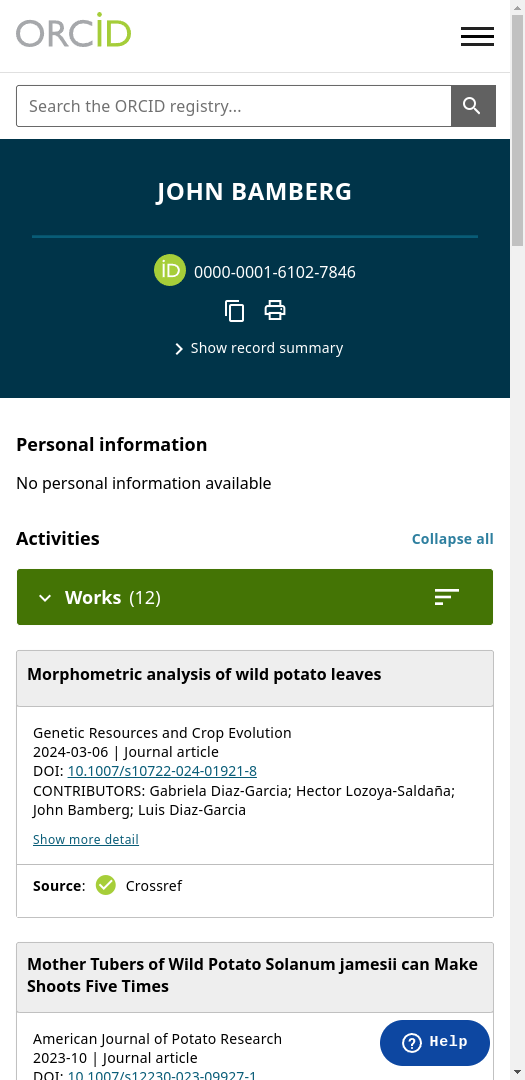

In [8]:

df.iloc[1]["screenshots"][0]

In [25]:
action = [
    {
        "action": {
            "name": "click",
            "args": {
                "xpath": "/html/body/app-root/div/div/app-my-orcid/main/div/div/div/app-main/section/app-work-stack-group/section/app-panels/div[2]/app-work-stack/app-panel/div[2]/app-work/app-panel-data/div/div[2]/div/a"
            }
        }
    }
]


In [28]:
from lavague.core.base_driver import BaseDriver
from PIL import Image
from PIL.PngImagePlugin import PngImageFile

from typing import Tuple, TypedDict
from PIL import Image
import json
import ast

class BoundingBox(TypedDict):
    x1: int
    y1: int
    x2: int
    y2: int

class ViewportSize(TypedDict):
    width: int
    height: int

class ScreenshotData(TypedDict):
    screenshot: Image.Image
    bounding_box: BoundingBox
    viewport_size: ViewportSize

def load_url(url: str, driver: BaseDriver) -> None:
    """Loads URL"""
    driver.get(url)
    
def get_screenshot(driver: BaseDriver) -> PngImageFile: 
    """Returns the screenshot of the current page"""
    current_screenshot_folder = driver.get_current_screenshot_folder()
    screenshot_path = driver.save_screenshot(current_screenshot_folder)
    img = Image.open(screenshot_path)
    return img

def highlight_element(driver: BaseDriver, action_list: str) -> ScreenshotData:
    """Returns the screenshot of the current page with the element highlighted"""
    
    # We assume that the code is a list of actions provided through a string and 
    data = json.dumps(action_list)
    screenshot_data = driver.get_highlighted_element(data)
    return screenshot_data

def execute_action(driver: BaseDriver, action_list: str) -> PngImageFile:
    """Executes the action"""
    for item in action_list:
        action_name = item["action"]["name"]
        if action_name == "click":
            driver.click(item["action"]["args"]["xpath"])
        elif action_name == "setValue":
            driver.set_value(
                item["action"]["args"]["xpath"], item["action"]["args"]["value"]
            )
        elif action_name == "setValueAndEnter":
            driver.set_value(
                item["action"]["args"]["xpath"],
                item["action"]["args"]["value"],
                True,
            )
        elif action_name == "wait":
            driver.perform_wait(item["action"]["args"]["duration"])
            
    screenshot = get_screenshot(driver)
    return screenshot
            
def get_triple_screenshot(driver: BaseDriver, url: str, engine_log) -> Tuple[PngImageFile]:
    """Returns the screenshot of the current page with the element highlighted"""
    driver.get(url)
    
    action_list = ast.literal_eval(engine_log[0]["action_outcomes"][0]["action"])
    instruction = engine_log[0]["navigation_engine_input"]
    
    before_screenshot = get_screenshot(driver)
    screenshot_data = highlight_element(driver, action_list)[0]["screenshot"]
    after_screenshot = execute_action(driver, action_list)
    
    return before_screenshot, screenshot_data, after_screenshot, instruction

screenshot_data = highlight_element(driver, action)

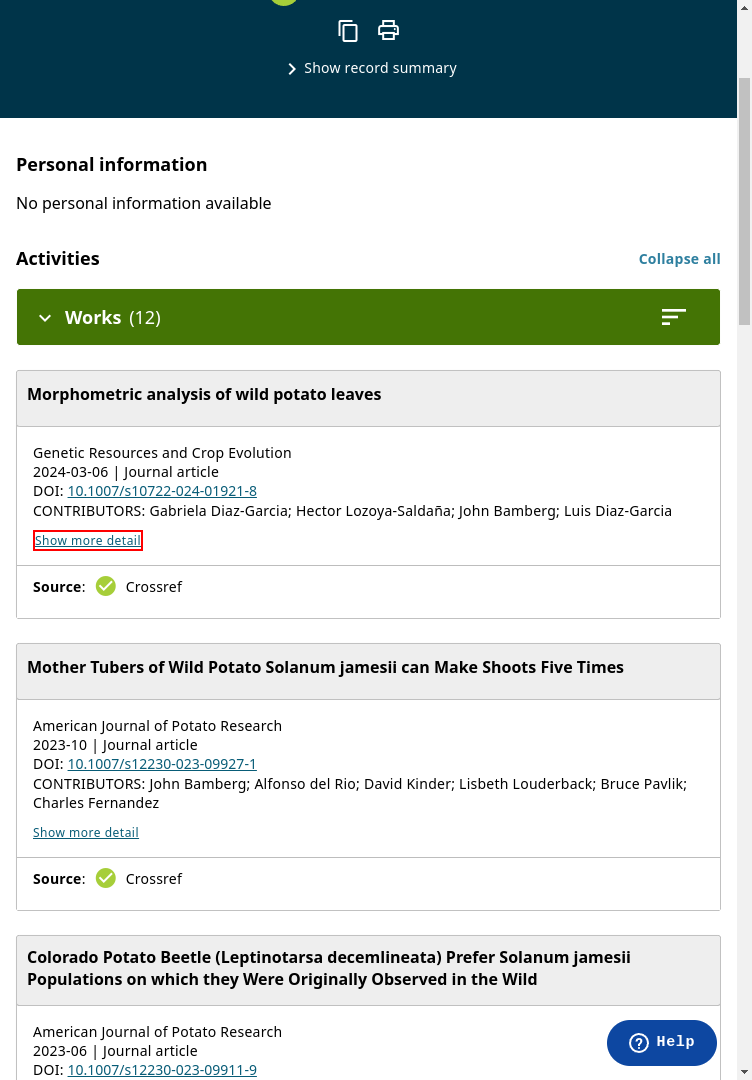

In [29]:
screenshot_data[0]["screenshot"]

In [11]:

# df.iloc[1]["screenshots"][0]

from IPython.display import display, HTML, Code

for node in df.iloc[1]["engine_log"][0]["retrieved_html"]:
    # display(HTML(node))
    # display(Code(node, language="html"))
    print(node)

<div _ngcontent-ng-c648724720="" class="col s4 m8 l12 content no-gutters ng-star-inserted"><!-- --><!-- --><!-- --><app-work-stack _ngcontent-ng-c1443003248="" _nghost-ng-c3463444522="" class="ng-star-inserted"><app-panel _ngcontent-ng-c3463444522="" _nghost-ng-c170191816="" class="last ng-star-inserted" panelid="work-stack" style="z-index: 1;"><div _ngcontent-ng-c170191816="" class="header box orc-font-body cy-panel-component header-bottom top-bar-or-main" id="cy-panel-component-work-stack-works-154821558"><!-- --><div _ngcontent-ng-c170191816="" class="ng-star-inserted"><!-- --><h4 _ngcontent-ng-c3463444522="" class="work-title orc-font-body ng-star-inserted" header="">Morphometric analysis of wild potato leaves</h4><!-- --><!-- --><!-- --></div><!-- --><!-- --><div _ngcontent-ng-c170191816="" class="buttons-container cy-buttons-container"><!-- --><!-- --><!-- --></div></div><div _ngcontent-ng-c170191816="" class="body ng-star-inserted"><app-work _ngcontent-ng-c3463444522="" _nghost-

In [14]:
df.iloc[1]["engine_log"][0]["action_outcomes"][0]["action"]

[
    {
        "action": {
            "name": "click",
            "args": {
                "xpath": "/html/body/app-root/div/div/app-my-orcid/main/div/div/div/app-main/section/app-work-stack-group/section/app-panels/div[2]/app-work-stack[12]/app-panel/div[2]/app-work/app-panel-data/div/div[2]/div/a"
            }
        }
    }
]


In [4]:
instruction = "Click on 'Show more detail' next to the paper 'Mother Tubers of Wild Potato'"

action_engine.navigation_engine.execute_instruction(instruction=instruction)

ActionResult(instruction='Click on the button "Show more detail"', code='[\n    {\n        "action": {\n            "name": "click",\n            "args": {\n                "xpath": "/html/body/app-root/div/div/app-my-orcid/main/div/div/div/app-main/section/app-work-stack-group/section/app-panels/div[2]/app-work-stack[12]/app-panel/div[2]/app-work/app-panel-data/div/div[2]/div/a"\n            }\n        }\n    }\n]', success=True, output=None)

In [5]:
instruction = "Click on the url 'https://doi.org/10.1007/s12230-019-09729-4'"

action_engine.navigation_engine.execute_instruction(instruction=instruction)

ActionResult(instruction='Click on the link "https://doi.org/10.1007/s12230-019-09729-4"', code='[\n    {\n        "action": {\n            "name": "click",\n            "args": {\n                "xpath": "/html/body/app-root/div/div/app-my-orcid/main/div/div/div/app-main/section/app-work-stack-group/section/app-panels/div[2]/app-work-stack[12]/app-panel/div[2]/app-work/app-panel-data[2]/div/div/app-display-attribute/div/div[2]/div/a"\n            }\n        }\n    }\n]', success=True, output=None)

In [1]:
# Install necessary elements
from lavague.drivers.selenium import SeleniumDriver
from lavague.core import ActionEngine, WorldModel
from lavague.core.agents import WebAgent

# Set up our three key components: Driver, Action Engine, World Model
driver = SeleniumDriver(headless=False)
action_engine = ActionEngine(driver)
world_model = WorldModel()

# Create Web Agent
agent = WebAgent(world_model, action_engine)

# Set URL
agent.get("https://huggingface.co/docs")


/home/dhuynh95/miniconda3/envs/lavague/lib/python3.10/site-packages/lavague/core/__init__.py:21: UserWarning: Telemetry is turned on. To turn off telemetry, set your LAVAGUE_TELEMETRY to 'NONE'
  warnings.warn(warning_message, UserWarning)
2024-07-09 15:41:16,499 - INFO - Screenshot folder cleared


In [2]:
# Run agent with a specific objective
agent.run("Provide description of the quicktour of PEFT")

Exception in thread Thread-4 (lavague_unicode_animation):
Traceback (most recent call last):
  File "/home/dhuynh95/miniconda3/envs/lavague/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/dhuynh95/miniconda3/envs/lavague/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/home/dhuynh95/miniconda3/envs/lavague/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/home/dhuynh95/miniconda3/envs/lavague/lib/python3.10/site-packages/lavague/core/utilities/unicode_animation.py", line 55, in lavague_unicode_animation
    term_size = os.get_terminal_size().columns // 2
OSError: [Errno 25] Inappropriate ioctl for device
2024-07-09 15:41:23,194 - INFO - Thoughts:
- The current screenshot shows the documentation page of Hugging Face.
- The objective is to provide a description of the quicktour of PEFT.
- PEFT is visible as one of the document

2024-07-09 15:41:33,794 - INFO - Thoughts:
- The current screenshot shows the PEFT documentation page on Hugging Face.
- The objective is to provide a description of the quicktour of PEFT.
- The quicktour section is visible in the left sidebar under the PEFT category.
- The next step is to click on the 'Quicktour' link to access its content.

Next engine: Navigation Engine
Instruction: Click on 'Quicktour' under the PEFT category in the left sidebar.


2024-07-09 15:41:47,346 - INFO - - The current screenshot shows the 'Quicktour' page under the PEFT category in the Hugging Face documentation.
- The objective is to provide a description of the quicktour of PEFT.
- The description is visible directly in the screenshot.
- The visual information is sufficient to extract and provide the description.

Next engine: COMPLETE
Instruction: PEFT offers parameter-efficient methods for finetuning large pretrained models. Traditional finetuning is to finetune all of a model's parameters for each downstream task, but this is becoming exceedingly costly and impractical because of the enormous number of parameters in models today. Instead, it is more efficient to train a smaller number of prompt parameters or use a reparameterization method like low-rank adaptation (LoRA) to reduce the number of trainable parameters. This quicktour will show you PEFT's main features and how you can use it for inference on large models that would typically be inacces

ActionResult(instruction=None, code='from selenium import webdriver\nfrom selenium.webdriver.common.by import By\nfrom selenium.webdriver.chrome.options import Options\nfrom selenium.webdriver.common.keys import Keys\nfrom selenium.webdriver.common.action_chains import ActionChains\nfrom lavague.core.base_driver import JS_SETUP_GET_EVENTS\n\nelse:\nchrome_options = Options()\nuser_agent = "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"\nchrome_options.add_argument(f"user-agent={user_agent}")\nchrome_options.add_argument("--no-sandbox")\nchrome_options.page_load_strategy = (\n)\nchrome_options.add_argument("--disable-web-security")\nchrome_options.add_argument("--disable-site-isolation-trials")\n\n"Page.addScriptToEvaluateOnNewDocument",\n{"source": JS_SETUP_GET_EVENTS},\n)\n\ndriver.set_window_size(1080, 1080)\nviewport_height = driver.execute_script("return window.innerHeight;")\nheight_difference = 1080 - viewport_height\nd

In [5]:
df = agent.logger.return_pandas()
df.engine_log[0]

[{'original_instruction': "Click on 'PEFT' in the documentation categories.",
  'navigation_engine_input': 'Click on "PEFT" in the documentation categories',
  'retrieved_html': ['<div class="relative pr-4 text-smd font-normal text-gray-400" xpath="/html/body/div/main/div/nav/a[9]/div[3]">Experiment with over 200k models easily using the serverless tier of Inference Endpoints.</div>\n</a>\n<a class="group group relative flex flex-col overflow-hidden border md:first:row-span-2 border-fuchsia-50 2x:pt-10 rounded-xl bg-gradient-to-r px-3 pb-4 pt-6 dark:border-gray-900 from-fuchsia-500/5 hover:shadow-alternate to-white shadow-none transition-shadow dark:from-gray-850 dark:to-gray-950 dark:hover:from-gray-800" href="/docs/inference-endpoints" target="_self" xpath="/html/body/div/main/div/nav/a[10]"><div class="absolute hidden h-16 w-[550px] rotate-45 transform bg-red-500/10 blur-3xl transition-transform group-first:block group-hover:-translate-y-24 dark:bg-white/10 md:h-24" xpath="/html/bod

In [1]:
# Install necessary elements
from lavague.drivers.selenium import SeleniumDriver
from lavague.core import ActionEngine, WorldModel
from lavague.core.agents import WebAgent

from llama_index.llms.gemini import Gemini
from llama_index.embeddings.fireworks import FireworksEmbedding
from llama_index.multi_modal_llms.gemini import GeminiMultiModal

embed_model = FireworksEmbedding()
mm_llm = GeminiMultiModal(model_name="models/gemini-1.5-pro-latest")
llm = Gemini(model_name="models/gemini-1.5-flash-latest")

from google.generativeai.types import HarmCategory, HarmBlockThreshold

llm._model._safety_settings={
    HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
}

# Set up our three key components: Driver, Action Engine, World Model
driver = SeleniumDriver()
action_engine = ActionEngine(driver, llm=llm, embedding=embed_model)
world_model = WorldModel()

# Create Web Agent
agent = WebAgent(world_model, action_engine)

# Set URL
agent.get("https://www.wikijournalclub.org/wiki/Main_Page")

objective = """I have the question: "what evidence is there for beta blockers helping patients after the patients suffered a myocardial infarction"
Find the most relevant paper to answer this question. Don't scan the whole page as it would be a waste of time as all articles are on the same page but scroll down or up if needed.
When answering the question using a given paper, explain how the paper is relevant, what were the major data that supports the answer, and how the experiment was designed."""

# Run agent with a specific objective
agent.demo(objective=objective)

/home/dhuynh95/miniconda3/envs/lavague/lib/python3.10/site-packages/lavague/core/__init__.py:21: UserWarning: Telemetry is turned on. To turn off telemetry, set your LAVAGUE_TELEMETRY to 'NONE'
  warnings.warn(warning_message, UserWarning)
/home/dhuynh95/miniconda3/envs/lavague/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-07-09 14:11:10,409 - INFO - Screenshot folder cleared


Running on local URL:  http://127.0.0.1:7860
IMPORTANT: You are using gradio version 4.26.0, however version 4.29.0 is available, please upgrade.
--------
Running on public URL: https://e010c91b8079321582.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


2024-07-09 14:11:21,040 - INFO - Screenshot folder cleared
2024-07-09 14:11:24,413 - INFO - Thoughts:
- The current screenshot shows the main page of the Wiki Journal Club, which summarizes and reviews landmark studies across various medical and surgical specialties.
- The objective is to find the most relevant paper that provides evidence for beta blockers helping patients after a myocardial infarction.
- The page has a section for browsing published articles by specialty, which includes 'Cardiology'.
- The next step should be to navigate to the 'Cardiology' section to find relevant papers.

Next engine: Navigation Engine
Instruction: Click on 'Cardiology' under the 'Browse' section.
2024-07-09 14:11:37,094 - INFO - Thoughts:
- The current screenshot shows a list of articles under the 'Cardiology' section.
- The objective is to find the most relevant paper that provides evidence for beta blockers helping patients after a myocardial infarction.
- The list includes several articles rela

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://e010c91b8079321582.gradio.live


In [9]:
df = agent.logger.return_pandas()
df.iloc[0]["engine_log"]

[{'original_instruction': "Click on 'Cardiology' under the 'Browse' section.",
  'navigation_engine_input': 'Click on "Cardiology"',
  'retrieved_html': ['<p xpath="/html/body/div[3]/div[3]/div[5]/div/div[3]/p"><span style="white-space:nowrap; page-break-inside:avoid; break-inside:avoid; -webkit-column-break-inside:avoid; -moz-column-break-inside:avoid; -o-column-break-inside:avoid; -ms-column-break-inside:avoid; column-break-inside:avoid;" xpath="/html/body/div[3]/div[3]/div[5]/div/div[3]/p/span"><a href="/wiki/WikiJournalClub:Usable_articles#Allergy_and_Immunology" title="WikiJournalClub:Usable articles" xpath="/html/body/div[3]/div[3]/div[5]/div/div[3]/p/span/a">Allergy and Immunology</a></span><br xpath="/html/body/div[3]/div[3]/div[5]/div/div[3]/p/br"/>\n<span style="white-space:nowrap; page-break-inside:avoid; break-inside:avoid; -webkit-column-break-inside:avoid; -moz-column-break-inside:avoid; -o-column-break-inside:avoid; -ms-column-break-inside:avoid; column-break-inside:avoi

In [2]:
added_knowledge = """Objective: Extract relevant information about this page's first profile's professional experience
Previous instructions:
- Click on 'Ethan Caldwell'
Last engine: Navigation Engine
Current state:
external_observations:
  vision: '[SCREENSHOT]'
internal_state:
    agent_outputs: []
    user_inputs: []

Thoughts:
- The current screenshot show a profile of an engineer working in finance.
- The objective is to find information about Ethan Caldwell's professional experience.
- We are only seeing the top of the page, so we need to scan the page for more information.
Next engine: Navigation Controls
Instruction: SCAN
-----
Objective: Extract relevant information about this page's first profile's professional experience
Previous instructions:
- Click on 'Ethan Caldwell'
- SCAN
Last engine: Navigation Controls
Current state:
external_observations:
  vision: '[SCREENSHOT]'
internal_state:
    agent_outputs: []
    user_inputs: []

Thoughts:
- The current screenshots show the whole profile of Ethan Caldwell.
- The objective is to find information about Ethan Caldwell's professional experience.
- We have sufficient information in the screenshots on this profile personal experience.
Next engine: COMPLETE
Instruction: Ethan has worked as a Data Scientist at BNP Paribas (June 2023 - Present, Paris, Hybrid), previously as a Business Intelligence Engineer Intern at Amazon (Oct 2022 - Feb 2023, Paris), a Data Scientist Intern at BNP Paribas Cardif (Apr 2022 - Oct 2022, Paris), and a Research Intern at ETIS Lab (Apr 2021 - Sep 2021, Paris), with skills in NumPy, SQL, Python, machine learning, R, databases, data analysis, and programming."""

In [4]:
print(added_knowledge)

Objective: Extract relevant information about this page's first profile's professional experience
Previous instructions:
- Click on 'Ethan Caldwell'
Last engine: Navigation Engine
Current state:
external_observations:
  vision: '[SCREENSHOT]'
internal_state:
    agent_outputs: []
    user_inputs: []

Thoughts:
- The current screenshot show a profile of an engineer working in finance.
- The objective is to find information about Ethan Caldwell's professional experience.
- We are only seeing the top of the page, so we need to scan the page for more information.
Next engine: Navigation Controls
Instruction: SCAN
-----
Objective: Extract relevant information about this page's first profile's professional experience
Previous instructions:
- Click on 'Ethan Caldwell'
- SCAN
Last engine: Navigation Controls
Current state:
external_observations:
  vision: '[SCREENSHOT]'
internal_state:
    agent_outputs: []
    user_inputs: []

Thoughts:
- The current screenshots show the whole profile of Etha

In [2]:
# Install necessary elements
from lavague.drivers.selenium import SeleniumDriver
from lavague.core import ActionEngine, WorldModel
from lavague.core.agents import WebAgent

from llama_index.llms.gemini import Gemini
from llama_index.embeddings.fireworks import FireworksEmbedding

from selenium.webdriver.chrome.options import Options

chrome_options = Options()
chrome_options.add_experimental_option("debuggerAddress", "127.0.0.1:9222")

embed_model = FireworksEmbedding()
llm = Gemini(model_name="models/gemini-1.5-flash-latest")

from google.generativeai.types import HarmCategory, HarmBlockThreshold

llm._model._safety_settings={
    HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
}

# Set up our three key components: Driver, Action Engine, World Model
driver = SeleniumDriver(options=chrome_options)
action_engine = ActionEngine(driver, llm=llm, embedding=embed_model)
world_model = WorldModel()

# Create Web Agent
agent = WebAgent(world_model, action_engine)


/home/dhuynh95/LaVague/lavague-core/lavague/core/__init__.py:21: UserWarning: Telemetry is turned on. To turn off telemetry, set your LAVAGUE_TELEMETRY to 'NONE'
  warnings.warn(warning_message, UserWarning)
/home/dhuynh95/miniconda3/envs/lavague/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-07-09 11:19:42,361 - INFO - Screenshot folder cleared


In [1]:
from selenium import webdriver

extension_path = '~/SingleFile.crx'

options = webdriver.ChromeOptions()
options.add_extension(extension_path)

driver = webdriver.Chrome(options=options)
driver.get("http://www.example.com")


In [1]:
# Install necessary elements
from lavague.drivers.selenium import SeleniumDriver
from lavague.core import ActionEngine, WorldModel
from lavague.core.agents import WebAgent

from llama_index.llms.gemini import Gemini
from llama_index.embeddings.fireworks import FireworksEmbedding

from selenium.webdriver.chrome.options import Options

chrome_options = Options()
chrome_options.add_experimental_option("debuggerAddress", "127.0.0.1:9222")

embed_model = FireworksEmbedding()
llm = Gemini(model_name="models/gemini-1.5-flash-latest")

from google.generativeai.types import HarmCategory, HarmBlockThreshold

llm._model._safety_settings={
    HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
}

# Set up our three key components: Driver, Action Engine, World Model
driver = SeleniumDriver(options=chrome_options)
action_engine = ActionEngine(driver, llm=llm, embedding=embed_model)
world_model = WorldModel()

# Create Web Agent
agent = WebAgent(world_model, action_engine)

/home/dhuynh95/LaVague/lavague-core/lavague/core/__init__.py:21: UserWarning: Telemetry is turned on. To turn off telemetry, set your LAVAGUE_TELEMETRY to 'NONE'
  warnings.warn(warning_message, UserWarning)
/home/dhuynh95/miniconda3/envs/lavague/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-07-08 13:57:26,209 - INFO - Screenshot folder cleared


In [2]:
objective = """Book a train from Paris to Lille for the 10th of July in the morning.
Proceed step by step. Do not provide more than one instruction at a time to the Navigation Engine.
Be precise when when targeting input fields, aka describe not only the element to be targeted but nearby relevant elements. 
For instance, a good instruction would be "Click on the input field with placeholder 'From', next to 'Flight' and type 'NYC'."""
agent.run(objective=objective)

Exception in thread Thread-5 (lavague_unicode_animation):
Traceback (most recent call last):
  File "/home/dhuynh95/miniconda3/envs/lavague/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/dhuynh95/miniconda3/envs/lavague/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/home/dhuynh95/miniconda3/envs/lavague/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/home/dhuynh95/LaVague/lavague-core/lavague/core/utilities/unicode_animation.py", line 55, in lavague_unicode_animation
    term_size = os.get_terminal_size().columns // 2
OSError: [Errno 25] Inappropriate ioctl for device
2024-07-08 13:57:30,368 - INFO - Thoughts:
- The current screenshot shows the homepage of a train booking website.
- The objective is to book a train from Paris to Lille for the 10th of July in the morning.
- The first step is to enter 'Paris' in the 'From

2024-07-08 13:57:43,927 - ERROR - Navigation error: No element found.
2024-07-08 13:57:45,409 - ERROR - Navigation error: No element found.
2024-07-08 13:57:47,165 - ERROR - Navigation error: No element found.
2024-07-08 13:57:49,139 - ERROR - Navigation error: No element found.
2024-07-08 13:57:51,078 - ERROR - Navigation error: No element found.
2024-07-08 13:57:57,358 - INFO - Thoughts:
- The current screenshot shows the booking page for trainline.
- The previous instruction failed, likely due to an incorrect description of the input field.
- The objective is to book a train from Paris to Lille for the 10th of July in the morning.
- The input fields for 'From' and 'To' are visible on the page.
- The next step should involve correctly targeting the 'From' input field and typing 'Paris'.

Next engine: Navigation Engine
Instruction: Click on the input field with placeholder 'From', next to 'To', and type 'Paris'.


2024-07-08 13:57:59,635 - WARNING - The agent was interrupted.


ActionResult(instruction=None, code='from selenium import webdriver\nfrom selenium.webdriver.common.by import By\nfrom selenium.webdriver.chrome.options import Options\nfrom selenium.webdriver.common.keys import Keys\nfrom selenium.webdriver.common.action_chains import ActionChains\n\nelse:\nchrome_options = Options()\nchrome_options.add_argument("--headless=new")\nuser_agent = "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"\nchrome_options.add_argument(f"user-agent={user_agent}")\nchrome_options.add_argument("--no-sandbox")\nchrome_options.page_load_strategy = (\n)\n\ndriver = webdriver.Chrome(options=chrome_options)\n\ndriver.set_window_size(1080, 1080)\nviewport_height = driver.execute_script("return window.innerHeight;")\nheight_difference = 1080 - viewport_height\ndriver.set_window_size(1080, 1080 + height_difference)\n\n', success=False, output=None)

In [8]:
instruction = "Click on the input field with placeholder 'City or station', next to 'From' and type 'Paris'."
action_engine.navigation_engine.execute_instruction(instruction)

ActionResult(instruction='Click on the input "City or station" and type "Paris"', code='[\n    {\n        "action": {\n            "name": "click",\n            "args": {\n                "xpath": "/html/body/div[2]/div/div[3]/main/section/div/div/div[1]/form/div/div[1]/div[1]/div[1]/input"\n            }\n        }\n    },\n    {\n        "action": {\n            "name": "setValue",\n            "args": {\n                "xpath": "/html/body/div[2]/div/div[3]/main/section/div/div/div[1]/form/div/div[1]/div[1]/div[1]/input",\n                "value": "Paris"\n            }\n        }\n    }\n]', success=True, output=None)

In [4]:
df.iloc[0]["engine_log"][0]["action_outcomes"][0]

{'llm_response': '```json\n[\n  {\n    "action": {\n      "name": "fail",\n      "args": {}\n    }\n  }\n]\n```',
 'action': '[\n  {\n    "action": {\n      "name": "fail",\n      "args": {}\n    }\n  }\n]',
 'action_generation_time': 2.052746295928955,
 'navigation_engine_full_prompt': '\n\nYou are a chrome extension and your goal is to interact with web pages. You have been given a series of HTML snippets and queries.\nYour goal is to return a list of actions that should be done in order to execute the actions.\nAlways target elements by XPATH.\n\nThe actions available are:\n\nName: click\nDescription: Click on an element with a specific xpath\nArguments:\n  - xpath (string)\n\nName: setValue\nDescription: Focus on and set the value of an input element with a specific xpath\nArguments:\n  - xpath (string)\n  - value (string)\n\nName: setValueAndEnter\nDescription: Like "setValue", except then it presses ENTER. Use this tool can submit the form when there\'s no "submit" button.\nArgum

In [3]:
df = agent.logger.return_pandas()
nodes = df.iloc[0]["engine_log"][0]["retrieved_html"]

from IPython.display import HTML, Code, display

for node in nodes:
    display(HTML(node))
    display(Code(node, language="html"))

<div class="ot-tgl-cntr ot-subgrp-tgl" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[6]/div[2]/div[2]/ul/li/div"><div class="ot-tgl" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[6]/div[2]/div[2]/ul/li/div/div"><input aria-label="Create profiles for personalised advertising" checked="" class="cookie-subgroup-handler" data-optanongroupid="IAB2V2_3" id="ot-sub-group-id-IAB2V2_3" name="switch" role="switch" type="checkbox" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[6]/div[2]/div[2]/ul/li/div/div/input"/> <label class="ot-switch" for="ot-sub-group-id-IAB2V2_3" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[6]/div[2]/div[2]/ul/li/div/div/label"><span aria-checked="false" class="ot-switch-nob" role="switch" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[6]/div[2]/div[2]/ul/li/div/div/label/span[1]"></span> <span class="ot-label-txt" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[6]/div[2]/div[2]/ul/li/div/div/label/span[2]">Switch Label</span></label> </div></div><p class="ot-subgrp-desc" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[6]/div[2]/div[2]/ul/li/p">Information about your activity on this service (such as forms you submit, content you look at) can be stored and combined with other information about you (for example, information from your previous activity on this service and other websites or apps) or similar users. This is then used to build or improve a profile about you (that might include possible interests and personal aspects). Your profile can be used (also later) to present advertising that appears more relevant based on your possible interests by this and other entities.</p><button aria-label="View Illustrations" class="ot-link-btn ot-pgph-link ot-pgph-link-subgroup" data-parent-id="IAB2V2_3" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[6]/div[2]/div[2]/ul/li/button">View Illustrations </button></li></ul></div><div class="ot-subgrp-cntr" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[6]/div[2]/div[3]"><ul class="ot-subgrps" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[6]/div[2]/div[3]/ul"><li class="ot-subgrp" data-optanongroupid="IAB2V2_4" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[6]/div[2]/div[3]/ul/li"><h5 xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[6]/div[2]/div[3]/ul/li/h5">Use profiles to select personalised advertising<span class="ot-pur-vdr-count" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[6]/div[2]/div[3]/ul/li/h5/span"> 80 partners can use this purpose </span></h5><div class="ot-tgl-cntr ot-subgrp-tgl" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[6]/div[2]/div[3]/ul/li/div">

<div class="ot-acc-hdr" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[8]/div[1]"><div class="ot-plus-minus" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[8]/div[1]/div[1]"><span xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[8]/div[1]/div[1]/span[1]"></span><span xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[8]/div[1]/div[1]/span[2]"></span></div><h4 class="ot-cat-header" id="ot-header-id-ISF2V2_2" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[8]/div[1]/h4">Actively scan device characteristics for identification<span class="ot-pur-vdr-count" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[8]/div[1]/h4/span"> 11 partners can use this purpose </span></h4><div class="ot-tgl" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[8]/div[1]/div[2]"><input aria-labelledby="ot-header-id-ISF2V2_2" checked="" class="category-switch-handler" data-optanongroupid="ISF2V2_2" id="ot-group-id-ISF2V2_2" name="ot-group-id-ISF2V2_2" role="switch" type="checkbox" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[8]/div[1]/div[2]/input"/> <label class="ot-switch" for="ot-group-id-ISF2V2_2" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[8]/div[1]/div[2]/label"><span aria-checked="true" aria-label="Actively scan device characteristics for identification" class="ot-switch-nob" role="switch" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[8]/div[1]/div[2]/label/span[1]"></span> <span class="ot-label-txt" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[8]/div[1]/div[2]/label/span[2]">Actively scan device characteristics for identification</span></label> </div></div><!-- accordion detail --><div class="ot-acc-grpcntr ot-acc-txt" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[8]/div[2]"><p class="ot-acc-grpdesc ot-category-desc" id="ot-desc-id-ISF2V2_2" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[8]/div[2]/p">With your acceptance, certain characteristics specific to your device might be requested and used to distinguish it from other devices (such as the installed fonts or plugins, the resolution of your screen) in support of the purposes explained in this notice.</p><div class="ot-vlst-cntr" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[8]/div[2]/div"><button aria-label="IAB Vendor Details button opens Vendor List menu" class="ot-link-btn category-vendors-list-handler" data-parent-id="ISF2V2_2" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[8]/div[2]/div/button">List of IAB Vendors‎</button></div></div></div><div class="ot-accordion-layout ot-cat-item ot-vs-config" data-optanongroupid="ISP2V2_1" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[9]"><button aria-controls="ot-desc-id-ISP2V2_1" aria-expanded="false" aria-labelledby="ot-header-id-ISP2V2_1 ot-status-id-ISP2V2_1" ot-accordion="true" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[9]/button"></button><!-- Accordion header --><div class="ot-acc-hdr" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[9]/div[1]"><div class="ot-plus-minus" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[9]/div[1]/div"><span xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[9]/div[1]/div/span[1]"></span><span xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[9]/div[1]/div/span[2]"></span></div><h4 class="ot-cat-header" id="ot-header-id-ISP2V2_1" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[9]/div[1]/h4">Ensure security, prevent and detect fraud, and fix errors<span class="ot-pur-vdr-count" xpath="/html/body/div[4]/div[2]/div/div[2]/section/div[9]/div[1]/h4/span"> 88 partners can use this purpose </span></h4></div><!-- accordion detail -->

In [3]:
objective = """Book an appointment with a dermatologist in Paris ASAP.
Proceed step by step. Do not provide more than one instruction at a time to the Navigation Engine.
Be precise when when targeting input fields. For instance, a good instruction would be "Click on the input with placeholder 'Search' and type 'Paris'".
"""

agent.run(objective=objective)

Exception in thread Thread-5 (lavague_unicode_animation):
Traceback (most recent call last):
  File "/home/dhuynh95/miniconda3/envs/lavague/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home/dhuynh95/miniconda3/envs/lavague/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 766, in run_closure
    _threading_Thread_run(self)
  File "/home/dhuynh95/miniconda3/envs/lavague/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/home/dhuynh95/LaVague/lavague-core/lavague/core/utilities/unicode_animation.py", line 55, in lavague_unicode_animation
    term_size = os.get_terminal_size().columns // 2
OSError: [Errno 25] Inappropriate ioctl for device


2024-07-09 11:19:54,456 - INFO - Thoughts:
- The current screenshot shows the homepage of Doctolib, a platform for booking medical appointments.
- The objective is to book an appointment with a dermatologist in Paris as soon as possible.
- The first step is to search for a dermatologist in Paris using the search input field.

Next engine: Navigation Engine
Instruction: Click on the input field with the placeholder 'Doctor, specialty, practice' and type 'Dermatologist Paris'.


2024-07-09 11:20:23,648 - INFO - ### Thoughts:
- The current screenshot shows a dropdown list with multiple options for 'Dermatologist Paris' after typing in the input field.
- The objective is to book an appointment with a dermatologist in Paris as soon as possible.
- The next step should involve selecting the appropriate option from the dropdown list to proceed with the booking.

### Next Engine:
Navigation Engine

### Instruction:
Click on 'Dermatologist and venereologist' in the dropdown list.


2024-07-09 11:20:37,783 - WARNING - The agent was interrupted.


ActionResult(instruction=None, code='from selenium import webdriver\nfrom selenium.webdriver.common.by import By\nfrom selenium.webdriver.chrome.options import Options\nfrom selenium.webdriver.common.keys import Keys\nfrom selenium.webdriver.common.action_chains import ActionChains\n\nelse:\nchrome_options = Options()\nchrome_options.add_argument("--headless=new")\nuser_agent = "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"\nchrome_options.add_argument(f"user-agent={user_agent}")\nchrome_options.add_argument("--no-sandbox")\nchrome_options.page_load_strategy = (\n)\n\ndriver = webdriver.Chrome(options=chrome_options)\n\ndriver.set_window_size(1080, 1080)\nviewport_height = driver.execute_script("return window.innerHeight;")\nheight_difference = 1080 - viewport_height\ndriver.set_window_size(1080, 1080 + height_difference)\n\n[\n  {\n    "action": {\n      "name": "setValue",\n      "args": {\n        "xpath": "/html/body/div

In [16]:
image_documents[0].image_path

'/home/dhuynh95/LaVague/screenshots/242b8e1a8d1907781f3054034b3ba721/21f64dcf2d8a97b8316487614e929ca8.png'

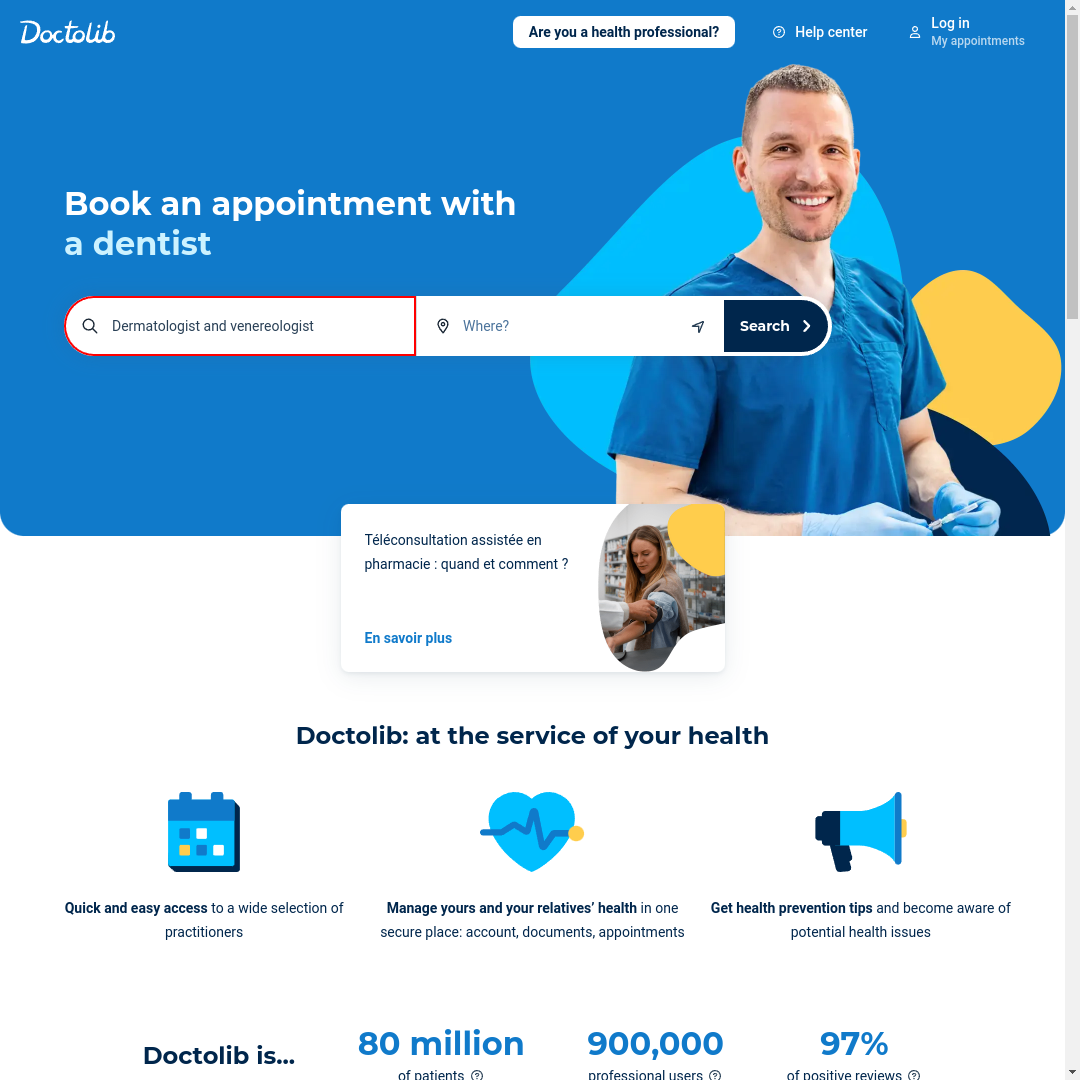

In [6]:
df = agent.logger.return_pandas()
df.screenshots[2][0]

In [2]:
from langchain_community.document_loaders import UnstructuredHTMLLoader

import re

def clean_text(input_text):
    # Remove HTML-like tags
    text = re.sub(r'<[^>]+>', '', input_text)
    
    # Remove redundant whitespace
    text = re.sub(r'\s+', ' ', text)
    
    # Remove redundant punctuation
    text = re.sub(r'([.,!?])\1+', r'\1', text)
    
    # Remove lines that are just numbers (like follower counts)
    text = re.sub(r'^\d+(\.\d+)?$', '', text, flags=re.MULTILINE)
    
    # Remove lines with just "Show all" or similar
    text = re.sub(r'^Show all.*$', '', text, flags=re.MULTILINE)
    
    # Remove lines with just "Follow" or "Following"
    text = re.sub(r'^(Follow|Following)$', '', text, flags=re.MULTILINE)
    
    # Remove empty lines
    text = re.sub(r'^\s*$\n', '', text, flags=re.MULTILINE)
    
    return text.strip()

def unstructured_html2text(file_name):
    documents = UnstructuredHTMLLoader(file_name).load()
    input_text = documents[0].page_content
    return input_text

def clean_html(html, html2text=None):
    if html2text is None:
        html2text = unstructured_html2text
        
    file_name = "page.html"
    with open(file_name, "w") as f:
        f.write(html)
        
    input_text = html2text(file_name)
    cleaned_text = clean_text(input_text)
    return cleaned_text

In [3]:
action_engine.python_engine.clean_html = clean_html

In [4]:
objective = """Explore all profiles. Click on each profile to see the details. 
Once on a given profile, use the Python Engine to extract the user's professional background, with each experience listed in bullet points with dates geo, and what they did. 
Then go back and select the next profile. Use information about the history of previous clicks to not click on the same profile again.
When mentioning information about the next profile to click on, say precisely the name of the profile and nothing more, like 'Click on Ethan Caldwell'."""

# Run agent with a specific objective
agent.run(objective=objective)

2024-06-24 08:25:18,596 - INFO - Thoughts:
- The current screenshot shows a LinkedIn search results page with multiple profiles listed.
- The objective is to explore each profile, extract the user's professional background, and then move to the next profile.
- The first step is to click on the first profile in the list to start the exploration process.

Next engine: Navigation Engine
Instruction: Click on 'David, Zouhair KHATOURI'.
2024-06-24 08:25:46,416 - INFO - Thoughts:
- The current screenshot shows the LinkedIn profile of David, Zouhair KHATOURI.
- The objective is to explore all profiles and extract the professional background of each user.
- The next step is to extract the professional background of David, Zouhair KHATOURI.
- After extracting the information, we will need to go back and select the next profile.

Next engine: Python Engine
Instruction: Extract the professional background of David, Zouhair KHATOURI, listing each experience in bullet points.
2024-06-24 08:26:04,97

ActionResult(instruction=None, code='from selenium import webdriver\nfrom selenium.webdriver.common.by import By\nfrom selenium.webdriver.chrome.options import Options\nfrom selenium.webdriver.common.keys import Keys\nfrom selenium.webdriver.common.action_chains import ActionChains\n\nelse:\nchrome_options = Options()\nchrome_options.add_argument("--headless")\nchrome_options.add_argument("--no-sandbox")\nchrome_options.page_load_strategy = (\n)\n\ndriver = webdriver.Chrome(options=chrome_options)\n\ndriver.set_window_size(1080, 1080)\nviewport_height = driver.execute_script("return window.innerHeight;")\nheight_difference = 1080 - viewport_height\ndriver.set_window_size(1080, 1080 + height_difference)\n\ndriver.get("https://www.linkedin.com/search/results/people/?keywords=polytechnique%20mva&origin=SWITCH_SEARCH_VERTICAL&sid=QG%2C")\n# Let\'s think step by step\n\n# First, we notice that the query asks us to click on the link "David, Zouhair KHATOURI".\n\n# In the provided HTML, we ca

In [ ]:
df = agent.logger.return_pandas()
print(df.iloc[4]["output"])
df.to_csv("examples.csv", index=None)

In [16]:
world_model_prompt = df.world_model_prompt[0]
world_model_prompt.split("Here is the next objective:")[1]

"\nObjective: Explore all profiles. Click on each profile to see the details. \nOnce on a given profile, use the Python Engine to extract the user's professional background, with each experience listed in bullet points. \nThen go back and select the next profile. Use information about the history of previous clicks to not click on the same profile again.\nWhen mentioning information about the next profile to click on, say precisely the name of the profile and nothing more, like 'Click on Ethan Caldwell'.\nPrevious instructions:\n[NONE]\nLast engine: [NONE]\nCurrent state:\nexternal_observations:\n  vision: '[SCREENSHOT]'\ninternal_state:\n  agent_outputs: []\n  user_inputs: []\n\n\nThought:\n"

In [21]:
df.world_model_output[0].replace("Thoughts:", "")

for index, row in df.iterrows():
    world_model_prompt = row["world_model_prompt"]
    world_model_output = row["world_model_output"]
    observation = world_model_prompt.split("Here is the next objective:")[1] + world_model_output.replace("Thoughts:", "")
    print(observation)
    print("-----")


Objective: Explore all profiles. Click on each profile to see the details. 
Once on a given profile, use the Python Engine to extract the user's professional background, with each experience listed in bullet points. 
Then go back and select the next profile. Use information about the history of previous clicks to not click on the same profile again.
When mentioning information about the next profile to click on, say precisely the name of the profile and nothing more, like 'Click on Ethan Caldwell'.
Previous instructions:
[NONE]
Last engine: [NONE]
Current state:
external_observations:
  vision: '[SCREENSHOT]'
internal_state:
  agent_outputs: []
  user_inputs: []


Thought:

- The current screenshot shows a LinkedIn search results page with multiple profiles listed.
- The objective is to explore each profile, extract the user's professional background, and then move to the next profile.
- The first step is to click on the first profile in the list to start the exploration process.

Nex